In [131]:
import numpy
from numpy import random
from scipy.special import polygamma
from scipy.stats import entropy
from scipy import stats
random.seed(123)
#dirichlet = random.dirichlet
dirichlet = stats.dirichlet.rvs

In [149]:
def moments(a=None, k=None):
    k, a = numpy.asarray(k), numpy.asarray(a)
    mu = polygamma(0, k * a + 1.0) - polygamma(0, a + 1.0)
    std = polygamma(1, a + 1.0) * (a + 1.0) / (k * a + 1.0) - polygamma(1, k * a + 1.0)
    std = numpy.sqrt(std)
    return (mu, std)

In [151]:
@numpy.vectorize
def numerical_moments(a = None, k=None):
    nrep = 1000
    pps = dirichlet([a]*k, size=nrep)
    hs = numpy.array([entropy(pp) for pp in pps])
    mu = numpy.mean(hs)
    std = numpy.std(hs)
    return (mu, std)

In [159]:
N = 100
K = 10000
alpha_range = numpy.logspace(-4, 1, 20)

In [160]:
mu, std = moments(a=alpha_range, k=K)
mu1, std1 = numerical_moments(a=alpha_range, k=K)

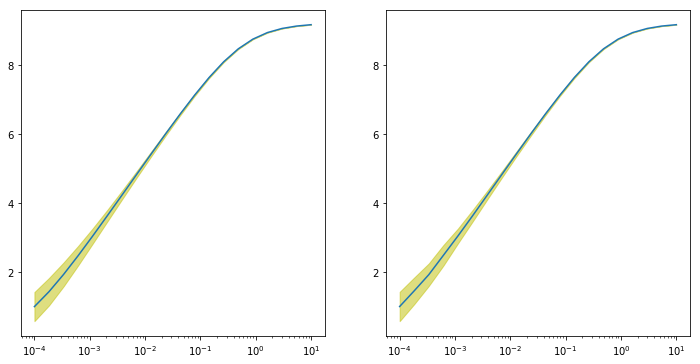

In [161]:
%matplotlib inline
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(12,6))

lk = numpy.log(K)
axs[0].semilogx()
axs[0].plot(alpha_range, mu, '-')
axs[0].fill_between(alpha_range, mu+std, mu-std, color='y', alpha=0.5)

axs[1].semilogx()
axs[1].plot(alpha_range, mu1, '-')
axs[1].fill_between(alpha_range, mu1+std1, mu1-std1, color='y', alpha=0.5)

In [172]:
N = 1000
K = 100
alpha_range = numpy.logspace(-4, 1, 20)

In [174]:
mu, std = moments(a=alpha_range, k=K)
mu1, std1 = numerical_moments(a=alpha_range, k=K)

/home/simo/.local/lib/python3.5/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


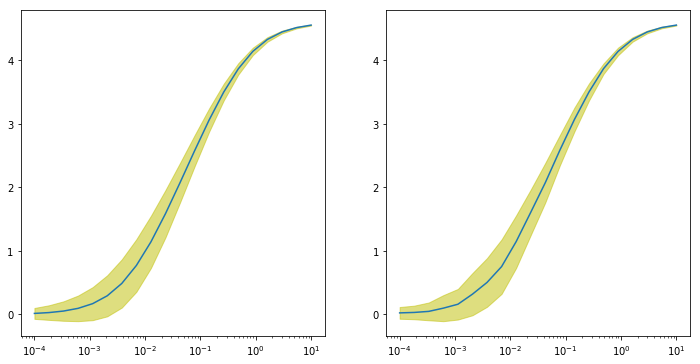

In [175]:
%matplotlib inline
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(12,6))

lk = numpy.log(K)
axs[0].semilogx()
axs[0].plot(alpha_range, mu, '-')
axs[0].fill_between(alpha_range, mu+std, mu-std, color='y', alpha=0.5)

axs[1].semilogx()
axs[1].plot(alpha_range, mu1, '-')
axs[1].fill_between(alpha_range, mu1+std1, mu1-std1, color='y', alpha=0.5)